In [1]:
# Read in data & import of packages & frameworks
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

%matplotlib inline

#from bkcharts import Bar, output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.layouts import column, row
from bokeh.plotting import reset_output
#from bkcharts.attributes import cat
from collections import Counter
from IPython.display import display

### 1. Read the data, Rename columns, Check is null

In [2]:
hr_data = pd.read_csv('/Users/vayne/Desktop/5001_project/turnover.csv', header=0)
hr_data = hr_data.rename(
    columns = {'sales' : 'department', 
               'average_montly_hours' : 'average_monthly_hours',
               'Work_accident' : 'work_accident'})
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Data Exploration

In [4]:
#2.1 shape
print("The data set has {} data points and {} variables.".format(*hr_data.shape))

The data set has 14999 data points and 10 variables.


In [5]:
#Exploration on dependent variables
turnover_rate = sum(hr_data.left==1) / 14999
turnover_rate
#0.2380825388359224 the data samples are imbalanced
#which may cause problems in the classification prediction
#we will use resampling methods to make a balanced training sets
#and train the classification models using both the imbalanced and balanced data 
#we will compare the performance of models trainned by imbalanced and balanced data 
#Also, as this is a imbalanced classification problem, we shoudld not use accurate only to evaluate the model performance
#the more reasonable evaluation metrices are ROC curve, AUC and confusion matrix.(some introductions to roc and auc can be added here)

0.2380825388359224

In [6]:
#2.2 Exploration on independent variables

In [7]:
hr_data.drop('left', axis = 1).head(10)
#we can see obvious deparement and salary are categorical variables
#and work_accident and promotion_last_5years are binary variables

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


In [8]:
# 2.3 the categorical variables
print("hr_data['department']:", hr_data['department'].unique(), '\n')
print("hr_data['salary']:", hr_data['salary'].unique())

hr_data['department']: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 

hr_data['salary']: ['low' 'medium' 'high']


In [9]:
# 2.4 the binary variables
print(sum(hr_data.work_accident==1) / 14999)
print(sum(hr_data.promotion_last_5years==1) / 14999)

0.1446096406427095
0.021268084538969265


In [10]:
# 2.5 Describe numerical data
df=hr_data.drop(['department','salary','left','work_accident','promotion_last_5years'], axis = 1)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [11]:
# Overview of summary (Turnover V.S. Non-turnover)
df2=hr_data.drop(['department','salary','work_accident','promotion_last_5years'], axis = 1)
turnover_Summary = df2.groupby('left')
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
left,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032
1,0.440098,0.718113,3.855503,207.419210,3.876505


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


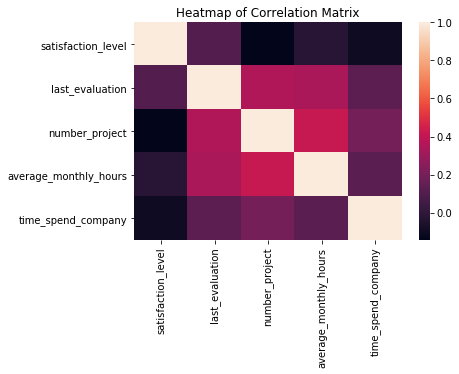

In [12]:
# 2.6 Correlation Matrix for numerical variables
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

In [13]:
# 2.7 Remark
#we can see that the number_project and time_spend_company is not really continuous number, which may cause some problems in the further research
#for example in logistic regression
#but it is not that suitable to change them into one-hat
#we have another way to treat with them, which wil show later
print("hr_data['number_project']:", hr_data['number_project'].unique(), '\n')
print("hr_data['time_spend_company']:", hr_data['time_spend_company'].unique())

hr_data['number_project']: [2 5 7 6 4 3] 

hr_data['time_spend_company']: [ 3  6  4  5  2  8 10  7]


### 3. Distribution Plots and Initial Understanding to employee turnover

Text(0, 0.5, 'Employee Count')

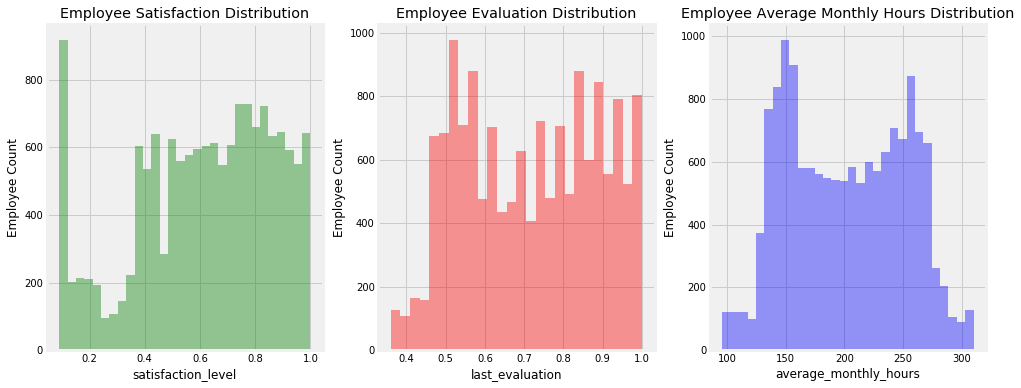

In [556]:
#3.1 Satisfaction - Evaluation - AverageMonthlyHours
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(hr_data.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(hr_data.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(hr_data.average_monthly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
The evaluation and average monthly hour graphs both share a similar distribution.
Employees with lower average monthly hours were evaluated less and vice versa.
If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

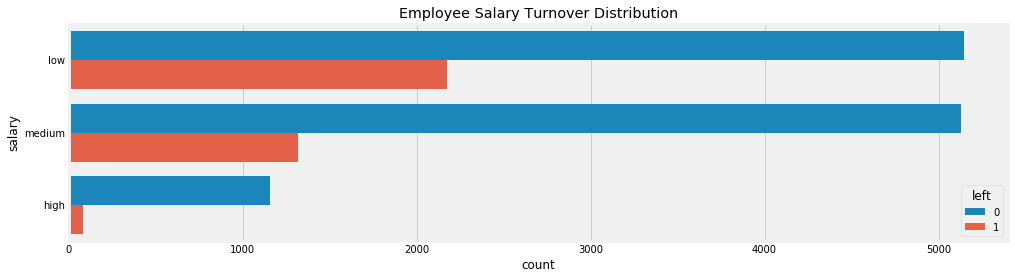

In [558]:
# 3.2 Salary V.S. Turnover
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=hr_data).set_title('Employee Salary Turnover Distribution');


Summary: This is not unusual. Here's what I found:

Majority of employees who left either had low or medium salary.
Barely any employees left with high salary
Employees with low to average salaries tend to leave the company.

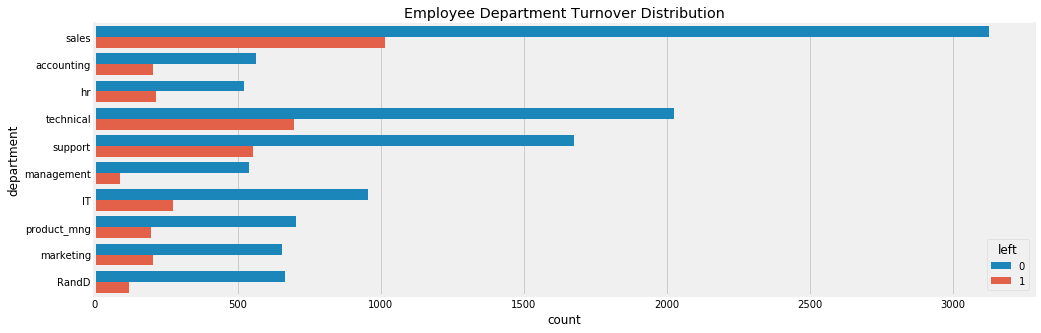

In [562]:
# 3.3 Department V.S. Turnover

f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=hr_data).set_title('Employee Department Turnover Distribution');

Summary: Let's see more information about the departments. Here's what I found:

The sales, technical, and support department were the top 3 departments to have employee turnover
The management department had the smallest amount of turnover

[Text(0, 0.5, 'Percent')]

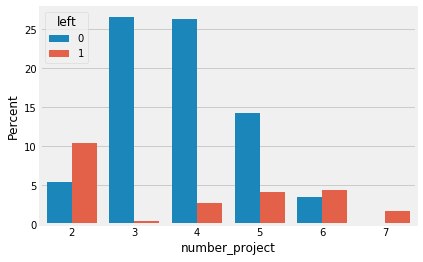

In [564]:
#3.4 Turnover V.S. ProjectCount
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=hr_data, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary: This graph is quite interesting as well. Here's what I found:

More than half of the employees with 2,6, and 7 projects left the company
Majority of the employees who did not leave the company had 3,4, and 5 projects
All of the employees with 7 projects left the company
There is an increase in employee turnover rate as project count increases

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

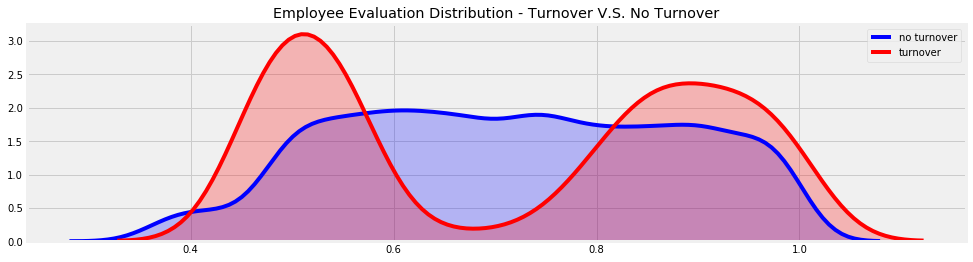

In [567]:
# 3.5
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary:

There is a biomodal distribution for those that had a turnover.
Employees with low performance tend to leave the company more
Employees with high performance tend to leave the company more
The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

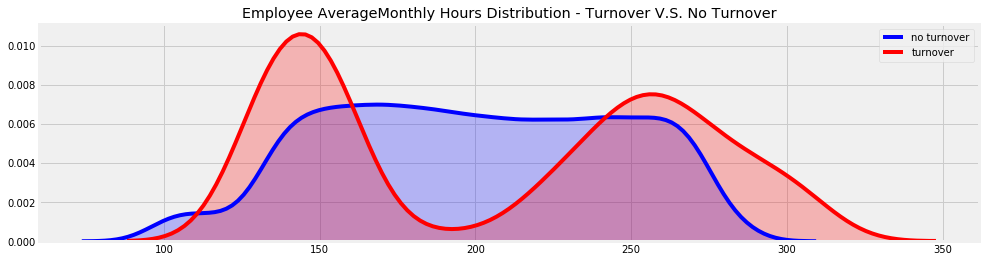

In [570]:
#3.6 Turnover V.S. AverageMonthlyHours
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 0),'average_monthly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 1),'average_monthly_hours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')


Summary:

Another bi-modal distribution for employees that turnovered
Employees who had less hours of work (~150hours or less) left the company more
Employees who had too many hours of work (~250 or more) left the company
Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

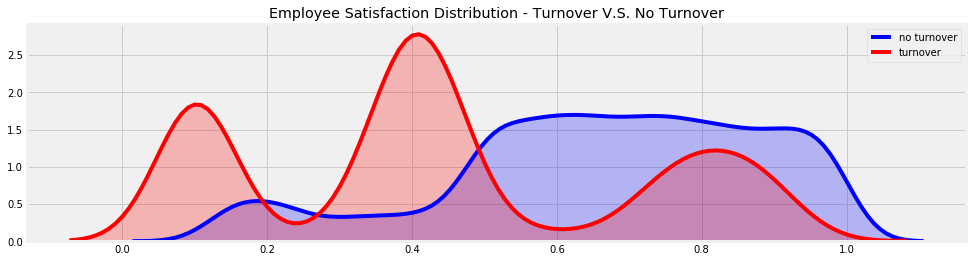

In [572]:
#3.7 Turnover V.S. Satisfaction
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(hr_data.loc[(hr_data['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

There is a tri-modal distribution for employees that turnovered
Employees who had really low satisfaction levels (0.2 or less) left the company more
Employees who had low satisfaction levels (0.3~0.5) left the company more
Employees who had really high satisfaction levels (0.7 or more) left the company more

### 4. Build the prediciton model

In [14]:
#change the categorical data into one-hat encoding
df1=pd.get_dummies(hr_data[['department','salary']])
hr_data = pd.concat([hr_data,df1],axis = 1) 
hr_data.drop(['department','salary'], axis = 1, inplace=True)
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
#numerical variable--Feature normalization
features = hr_data.loc[:,'satisfaction_level':'time_spend_company']
hr_data.loc[:,'satisfaction_level':'time_spend_company']= (features-features.mean())/features.std() 
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,-0.936463,-1.087239,-1.462814,-0.882010,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.752789,0.840679,0.971081,1.220382,1.713379,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-2.022412,0.957522,2.593677,1.420610,0.343644,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.431027,0.899101,0.971081,0.439493,1.028511,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.976684,-1.145661,-1.462814,-0.841965,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,-0.815803,-1.262504,-1.462814,-0.962102,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,-2.062632,0.314883,1.782379,0.920040,0.343644,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,1.235433,0.782257,0.971081,1.160314,1.028511,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,1.114772,1.658583,0.971081,0.459516,1.028511,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,-0.775582,-1.087239,-1.462814,-1.182352,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Training LinearSVC ...
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2286
           1       0.56      0.26      0.36       714

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.61      3000
weighted avg       0.75      0.78      0.74      3000



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Fu

Average CV performance for LinearSVC: 0.817339 (in 1.26584 seconds)
Training LogisticRegression ...
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.35      0.45       714

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

Average CV performance for LogisticRegression: 0.818266 (in 0.113187 seconds)
Training DecisionTreeClassifier ...
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.92      0.96      0.94       714

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Average CV performance for DecisionTreeClassifier: 0.976506 (in 0.154187 seconds)
Training RandomForestClassifier ...
              

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average CV performance for RandomForestClassifier: 0.990398 (in 0.273022 seconds)
Training AdaBoostClassifier ...
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.92      0.90      0.91       714

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000

Average CV performance for AdaBoostClassifier: 0.980883 (in 8.83859 seconds)


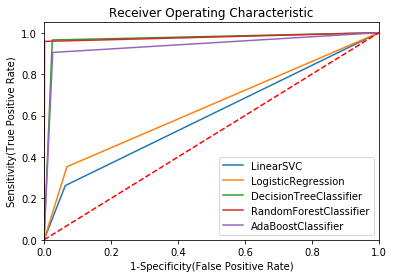

In [17]:
#4.1 Use the original data to train the model
# Implement learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


plt.figure()

# Let's keep 20 % of the data for testing purposes
test_size = .2
random_state = 42

X_all_base = hr_data.drop('left', 1)
y_all_base = hr_data['left']

# Use for testing later and don't touch: X_test_base / y_test_base
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_all_base, y_all_base, test_size = test_size, random_state = random_state, stratify=y_all_base)

clf_dict_base = {}
clf_report_base = []
auc_base=[]

for clf in [LinearSVC(random_state = random_state),
            LogisticRegression(random_state = random_state),
            DecisionTreeClassifier(random_state = random_state),
            RandomForestClassifier(random_state = random_state),
            AdaBoostClassifier(n_estimators=400, learning_rate=0.1) ]:
    # Extract name of estimator
    clf_name = clf.__class__.__name__
    print("Training", clf_name, "...")
    # Fit model on training data
    clf_dict_base[clf_name] = clf.fit(X_train_base, y_train_base)
    
    # Predict based on it
    y_pred = clf.predict(X_test_base)
    fpr, tpr, thresh= metrics.roc_curve(y_test_base,y_pred)
    auc = metrics.roc_auc_score(y_test_base,y_pred)
    plt.plot(fpr, tpr, label=clf_name)
    print(classification_report(y_test_base, y_pred))
    
    
    
    
    # Perform cross validation
    start = time()
    scores = cross_val_score(clf, X_train_base, y_train_base, cv=5, scoring='roc_auc') 
    end = time()
    duration = end - start
    print("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(
        clf_name, scores.mean(), duration))
    
    clf_report_base.append([clf_name, scores.mean(), duration])
    auc_base.append([clf_name, auc])

# Store information in list for better visibility

clf_report_base = pd.DataFrame(clf_report_base, columns=['classifier', 'mean_score', 'time'])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [18]:
auc_base

[['LinearSVC', 0.5992375953005874],
 ['LogisticRegression', 0.6423498533271577],
 ['DecisionTreeClassifier', 0.9702445282574973],
 ['RandomForestClassifier', 0.9783354286596528],
 ['AdaBoostClassifier', 0.9394763154605673]]

In [19]:
clf_report_base

,classifier,mean_score,time
0,LinearSVC,0.817339,1.265837
1,LogisticRegression,0.818266,0.113187
2,DecisionTreeClassifier,0.976506,0.154187
3,RandomForestClassifier,0.990398,0.273022
4,AdaBoostClassifier,0.980883,8.838587


Training LinearSVC ...
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.78      3000



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Fu

Average CV performance for LinearSVC: 0.825624 (in 1.72759 seconds)
Training LogisticRegression ...
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2286
           1       0.51      0.81      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.79      3000

Average CV performance for LogisticRegression: 0.826278 (in 0.132313 seconds)
Training DecisionTreeClassifier ...
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2286
           1       0.95      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000

Average CV performance for DecisionTreeClassifier: 0.976199 (in 0.213416 seconds)
Training RandomForestClassifier ...
              

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average CV performance for RandomForestClassifier: 0.990167 (in 0.373362 seconds)
Training AdaBoostClassifier ...
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.92      0.90      0.91       714

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000

Average CV performance for AdaBoostClassifier: 0.980883 (in 8.60192 seconds)


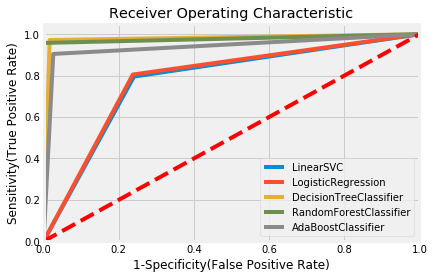

In [578]:
#4.2 Balanced Class Weights Training
# balanced class weights
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


plt.figure()

# Let's keep 20 % of the data for testing purposes
test_size = .2
random_state = 42

X_all_base = hr_data.drop('left', 1)
y_all_base = hr_data['left']

# Use for testing later and don't touch: X_test_base / y_test_base
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_all_base, y_all_base, test_size = test_size, random_state = random_state, stratify=y_all_base)

clf_dict_base = {}
clf_report_base = []
auc_base=[]

for clf in [LinearSVC(random_state = random_state,class_weight = "balanced"),
            LogisticRegression(random_state = random_state,class_weight = "balanced"),
            DecisionTreeClassifier(random_state = random_state,class_weight = "balanced"),
            RandomForestClassifier(random_state = random_state,class_weight = "balanced"),
            AdaBoostClassifier(n_estimators=400, learning_rate=0.1) ]:
    # Extract name of estimator
    clf_name = clf.__class__.__name__
    print("Training", clf_name, "...")
    # Fit model on training data
    clf_dict_base[clf_name] = clf.fit(X_train_base, y_train_base)
    
    # Predict based on it
    y_pred = clf.predict(X_test_base)
    fpr, tpr, thresh= metrics.roc_curve(y_test_base,y_pred)
    auc = metrics.roc_auc_score(y_test_base,y_pred)
    plt.plot(fpr, tpr, label=clf_name)
    print(classification_report(y_test, y_pred))
    
    
    
    
    # Perform cross validation
    start = time()
    scores = cross_val_score(clf, X_train_base, y_train_base, cv=5, scoring='roc_auc') 
    end = time()
    duration = end - start
    print("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(
        clf_name, scores.mean(), duration))
    
    clf_report_base.append([clf_name, scores.mean(), duration])
    auc_base.append([clf_name, auc])

# Store information in list for better visibility

clf_report_base = pd.DataFrame(clf_report_base, columns=['classifier', 'mean_score', 'time'])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [579]:
auc_base

[['LinearSVC', 0.7774616408243086],
 ['LogisticRegression', 0.7838946602262953],
 ['DecisionTreeClassifier', 0.9779016593514046],
 ['RandomForestClassifier', 0.9783354286596528],
 ['AdaBoostClassifier', 0.9394763154605673]]

Without resampling the data, one can also make the classifier aware of the imbalanced data by incorporating the weights of the classes into the cost function (aka objective function). Intuitively, we want to give higher weight to minority class and lower weight to majority class. scikit-learn has a convenient utility function to calculate the weights based on class frequencies:

Training LinearSVC ...
Average CV performance for LinearSVC: 0.831752 (in 1.85298 seconds)
Training LogisticRegression ...
Average CV performance for LogisticRegression: 0.832488 (in 0.126243 seconds)
Training DecisionTreeClassifier ...


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Average CV performance for DecisionTreeClassifier: 0.979546 (in 0.22286 seconds)
Training RandomForestClassifier ...


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average CV performance for RandomForestClassifier: 0.997433 (in 0.453804 seconds)
Training AdaBoostClassifier ...
Average CV performance for AdaBoostClassifier: 0.984898 (in 15.0351 seconds)


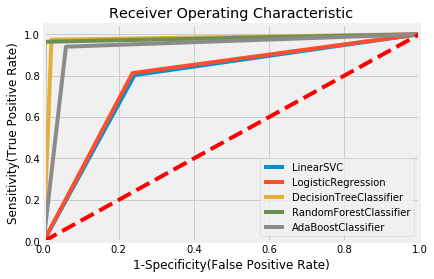

In [415]:
#4.3 Training the model with SMOTE resampling data (Synthetic Minority Over-sampling Technique)
#Resampling--SMOTE
from imblearn.over_sampling import SMOTE

test_size = .2
random_state = 42

X_all_base = hr_data.drop('left', 1)
y_all_base = hr_data['left']

# Use for testing later and don't touch: X_test_base / y_test_base
X_train_base, X_test, y_train_base, y_test = train_test_split(
    X_all_base, y_all_base, test_size = test_size, random_state = random_state, stratify=y_all_base)
smote = SMOTE(ratio='minority')

X_train_sm, y_train_sm = smote.fit_sample(X_train_base, y_train_base)

clf_dict_sm = {}
clf_report_sm = []
auc_sm=[]

for clf in [LinearSVC(random_state = random_state),
            LogisticRegression(random_state = random_state),
            DecisionTreeClassifier(random_state = random_state),
            RandomForestClassifier(random_state = random_state),
            AdaBoostClassifier(n_estimators=400, learning_rate=0.1) ]:
    # Extract name of estimator
    clf_name = clf.__class__.__name__
    print("Training", clf_name, "...")
    # Fit model on training data
    clf_dict_sm[clf_name] = clf.fit(X_train_sm, y_train_sm)
    
    # Predict based on it
    y_pred = clf.predict(X_test)
    fpr, tpr, thresh= metrics.roc_curve(y_test,y_pred)
    auc = metrics.roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, label=clf_name)
    
    
    
    
    
    # Perform cross validation
    start = time()
    scores = cross_val_score(clf, X_train_sm, y_train_sm, cv=5, scoring='roc_auc') 
    end = time()
    duration = end - start
    print("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(
        clf_name, scores.mean(), duration))
    clf_report_sm.append([clf_name, scores.mean(), duration])
    auc_sm.append([clf_name, auc])
    # Store feature relevance information 
    
# Store information in list for better visibility

clf_report_sm = pd.DataFrame(clf_report_sm, columns=['classifier', 'mean_score', 'time'])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display


In [416]:
auc_sm

[['LinearSVC', 0.7803068734055302],
 ['LogisticRegression', 0.7878335061058545],
 ['DecisionTreeClassifier', 0.9761959902071066],
 ['RandomForestClassifier', 0.9804803811288296],
 ['AdaBoostClassifier', 0.9401416734672872]]

In [582]:
#4.4 change the encoding way and resmpling
hr_data =  pd.read_csv('/Users/vayne/Desktop/retrainset.csv', header=0)
hr_data.head(10)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.70,0.59,middle,138,middle,0,0,0,RandD,low
1,0.72,0.70,middle,238,short,0,0,0,management,low
2,0.91,0.97,many,183,middle,0,0,0,support,low
3,0.21,0.85,many,285,long,0,0,0,sales,medium
4,0.60,0.95,many,164,long,0,0,0,sales,medium
5,0.63,0.59,many,249,short,0,0,0,technical,low
6,0.90,0.97,many,239,long,0,0,0,technical,medium
7,0.77,0.76,many,263,long,0,0,0,sales,low
8,0.63,0.52,many,209,long,1,0,0,RandD,low
9,0.62,0.51,middle,222,middle,1,0,0,technical,medium


In [583]:
#one-hat encoding
df1=pd.get_dummies(hr_data[['department','salary','number_project','time_spend_company']])
hr_data = pd.concat([hr_data,df1],axis = 1) 
hr_data.drop(['department','salary','number_project','time_spend_company'], axis = 1, inplace=True)
hr_data.head(10)


test_data=pd.read_csv('/Users/vayne/Desktop/testset.csv', header=0)
df2=pd.get_dummies(test_data[['department','salary','number_project','time_spend_company']])
test_data = pd.concat([test_data,df2],axis = 1) 
test_data.drop(['department','salary','number_project','time_spend_company'], axis = 1, inplace=True)
test_data.head(10)

,satisfaction_level,last_evaluation,average_montly_hours,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,...,department_technical,salary_high,salary_low,salary_medium,number_project_little,number_project_many,number_project_middle,time_spend_company_long,time_spend_company_middle,time_spend_company_short
0,0.41,0.50,153,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.42,0.53,142,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.45,0.54,135,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0.84,0.92,234,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0.41,0.55,148,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,0.45,0.47,160,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6,0.11,0.83,282,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
7,0.38,0.55,147,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8,0.46,0.57,139,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
9,0.40,0.53,158,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


Training LogisticRegression ...


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Average CV performance for LogisticRegression: 0.922436 (in 0.141674 seconds)
Training DecisionTreeClassifier ...
Average CV performance for DecisionTreeClassifier: 0.983008 (in 0.126646 seconds)
Training RandomForestClassifier ...


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average CV performance for RandomForestClassifier: 0.996694 (in 0.234929 seconds)
Training AdaBoostClassifier ...
Average CV performance for AdaBoostClassifier: 0.976863 (in 8.0538 seconds)


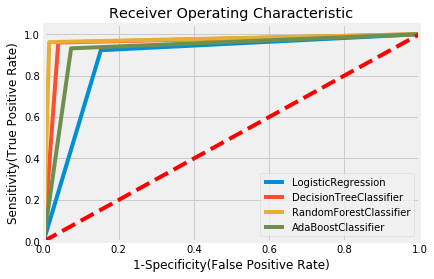

In [584]:
# balanced class weights
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


plt.figure()

# Let's keep 20 % of the data for testing purposes
test_size = .2
random_state = 42

X_all_base = hr_data.drop('left', 1)
y_all_base = hr_data['left']

X_train_base=X_all_base
y_train_base=y_all_base

X_test_base=test_data.drop('left', 1)
y_test_base=test_data['left']

clf_dict_base = {}
clf_report_base = []
auc_base=[]

for clf in [
            LogisticRegression(random_state = random_state,class_weight = "balanced"),
            DecisionTreeClassifier(random_state = random_state,class_weight = "balanced"),
            RandomForestClassifier(random_state = random_state,class_weight = "balanced"),
            AdaBoostClassifier(n_estimators=400, learning_rate=0.1) ]:
    # Extract name of estimator
    clf_name = clf.__class__.__name__
    print("Training", clf_name, "...")
    # Fit model on training data
    clf_dict_base[clf_name] = clf.fit(X_train_base, y_train_base)
    
    # Predict based on it
    y_pred = clf.predict(X_test_base)
    fpr, tpr, thresh= metrics.roc_curve(y_test_base,y_pred)
    auc = metrics.roc_auc_score(y_test_base,y_pred)
    plt.plot(fpr, tpr, label=clf_name)
    #print(classification_report(y_test, y_pred))
    
    
    
    
    # Perform cross validation
    start = time()
    scores = cross_val_score(clf, X_train_base, y_train_base, cv=5, scoring='roc_auc') 
    end = time()
    duration = end - start
    print("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(
        clf_name, scores.mean(), duration))
    
    clf_report_base.append([clf_name, scores.mean(), duration])
    auc_base.append([clf_name, auc])

# Store information in list for better visibility

clf_report_base = pd.DataFrame(clf_report_base, columns=['classifier', 'mean_score', 'time'])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [585]:
auc_base

[['LogisticRegression', 0.8851871657754011],
 ['DecisionTreeClassifier', 0.9604411764705882],
 ['RandomForestClassifier', 0.9734090909090909],
 ['AdaBoostClassifier', 0.9292914438502673]]

### 5.Build a explainable logistic regression model



 ---Decision Tree Model---
Decision Tree AUC = 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.92      0.92      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



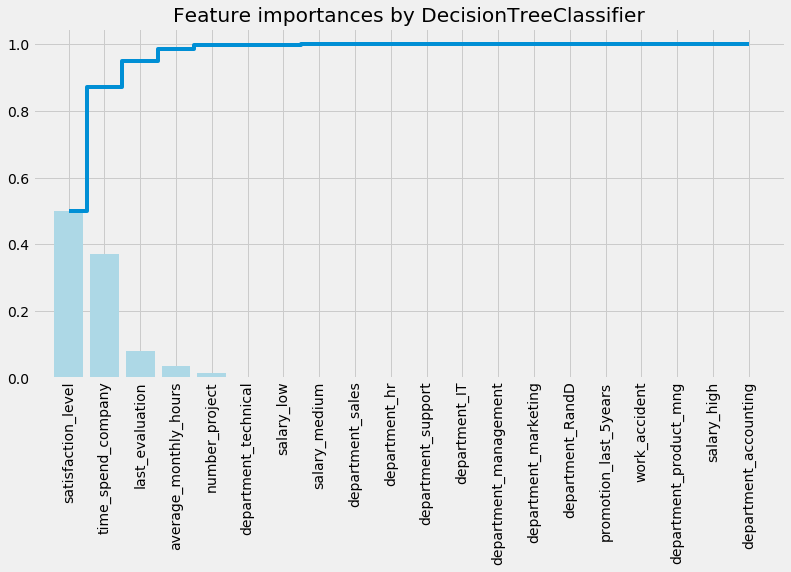

In [20]:
# Decision Tree Model
dtree = DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train_base, y_train_base)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test_base, dtree.predict(X_test_base))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test_base, dtree.predict(X_test_base)))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = hr_data.drop(['left'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

def dt_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = dt_feat_importance(dtree, X_train_base);

In [588]:
fi

,cols,imp
0,satisfaction_level,0.544274
21,time_spend_company_long,0.196271
1,last_evaluation,0.120574
2,average_montly_hours,0.060938
20,number_project_middle,0.047233
19,number_project_many,0.023944
16,salary_low,0.002501
14,department_technical,0.002365
18,number_project_little,0.001104
9,department_management,0.000449


In [46]:
hr_data =  pd.read_csv('/Users/vayne/Desktop/retrainset.csv', header=0)

#df1=pd.get_dummies(hr_data[['number_project','time_spend_company']])
#hr_data = pd.concat([hr_data,df1],axis = 1) 
hr_data.drop(['department','salary','work_accident','promotion_last_5years'], axis = 1, inplace=True)

#hr_data.drop(['number_project_little','time_spend_company_long'], axis = 1, inplace=True)



test_data=pd.read_csv('/Users/vayne/Desktop/testset.csv', header=0)
#df2=pd.get_dummies(test_data[['number_project','time_spend_company']])
#test_data = pd.concat([test_data,df2],axis = 1) 
test_data.drop(['department','salary','work_accident','promotion_last_5years'], axis = 1, inplace=True)
#test_data.drop(['number_project_little','time_spend_company_long'], axis = 1, inplace=True)
test_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
0,0.41,0.50,little,153,middle,1
1,0.42,0.53,little,142,middle,1
2,0.45,0.54,little,135,middle,1
3,0.84,0.92,many,234,long,1
4,0.41,0.55,little,148,middle,1
5,0.45,0.47,little,160,middle,1
6,0.11,0.83,many,282,long,1
7,0.38,0.55,little,147,middle,1
8,0.46,0.57,little,139,middle,1
9,0.40,0.53,little,158,middle,1


In [54]:
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
0,0.70,0.59,middle,138,middle,0
1,0.72,0.70,middle,238,short,0
2,0.91,0.97,many,183,middle,0
3,0.21,0.85,many,285,long,0
4,0.60,0.95,many,164,long,0
5,0.63,0.59,many,249,short,0
6,0.90,0.97,many,239,long,0
7,0.77,0.76,many,263,long,0
8,0.63,0.52,many,209,long,0
9,0.62,0.51,middle,222,middle,0


In [ ]:
df2=pd.get_dummies(test_data[['number_project','time_spend_company']])
test_data = pd.concat([test_data,df2],axis = 1) 
test_data.drop(['department','salary','number_project','time_spend_company','work_accident','promotion_last_5years'], axis = 1, inplace=True)
test_data.drop(['number_project_little','time_spend_company_long'], axis = 1, inplace=True)
test_data.head(10)

X_all_base = hr_data.drop('left', 1)
y_all_base = hr_data['left']

X_train_base=X_all_base
y_train_base=y_all_base

X_test_base=test_data.drop('left', 1)
y_test_base=test_data['left']


In [35]:
X_train_base

,satisfaction_level,last_evaluation,average_montly_hours,number_project_many,number_project_middle,time_spend_company_middle,time_spend_company_short
0,0.70,0.59,138,0,1,1,0
1,0.72,0.70,238,0,1,0,1
2,0.91,0.97,183,1,0,1,0
3,0.21,0.85,285,1,0,0,0
4,0.60,0.95,164,1,0,0,0
5,0.63,0.59,249,1,0,0,1
6,0.90,0.97,239,1,0,0,0
7,0.77,0.76,263,1,0,0,0
8,0.63,0.52,209,1,0,0,0
9,0.62,0.51,222,0,1,1,0


In [36]:
model=LogisticRegression()
model.fit(X_train_base, y_train_base)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
auc = metrics.roc_auc_score(y_test_base,y_pred)
auc

ValueError: Found input variables with inconsistent numbers of samples: [4500, 3000]

In [38]:
model.coef_ 

array([[-2.12943315,  3.32501875,  0.01186208, -4.12335426, -6.14478933,
        -1.32431822, -3.55859622]])

In [33]:
model.intercept_

array([0.51382862])

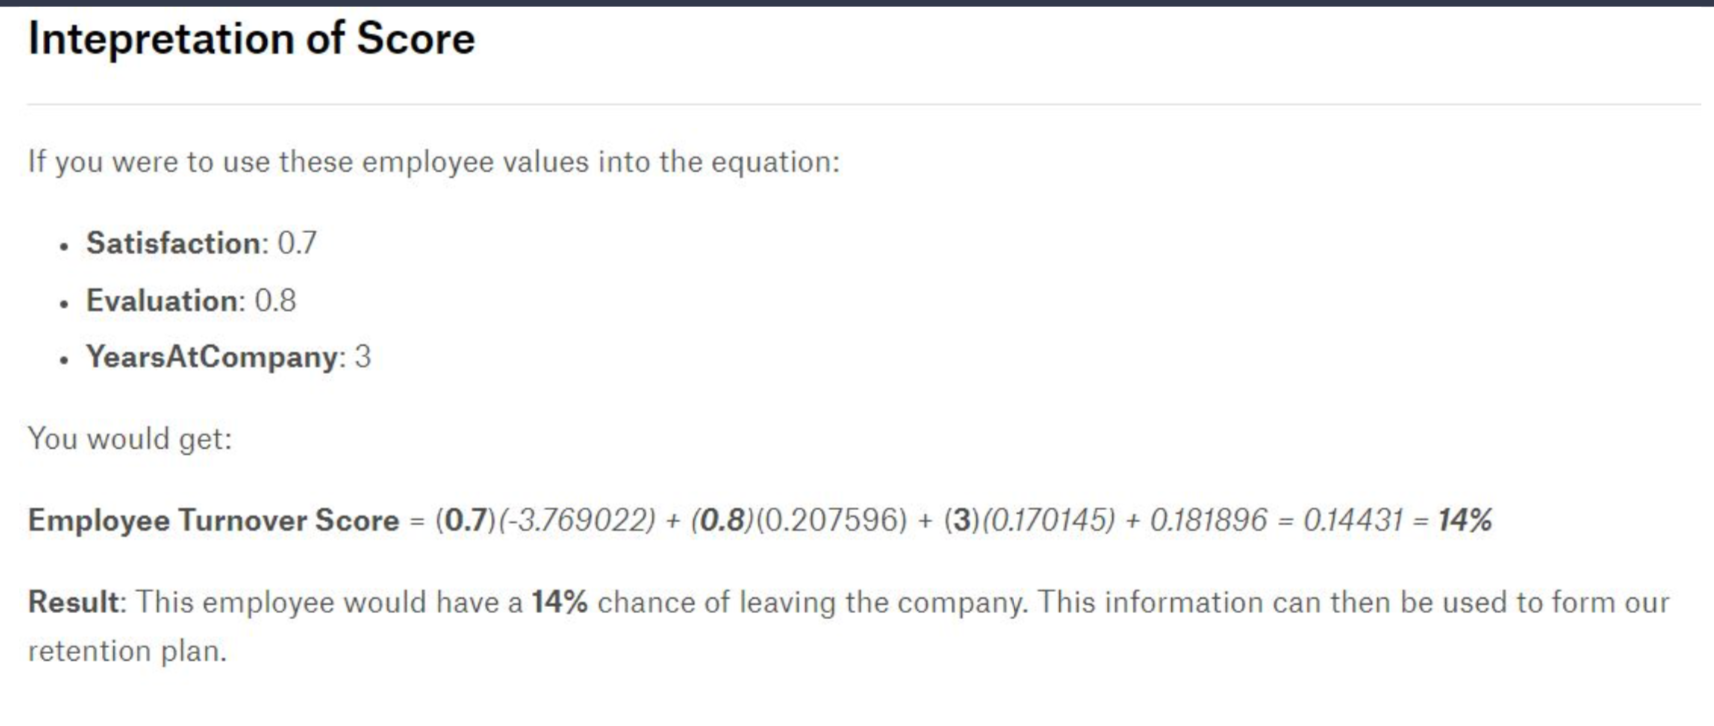

In [ ]:
#Something may not be used 

In [391]:
hr_data =  pd.read_csv('/Users/vayne/Desktop/5001_project/turnover.csv', header=0)
hr_data = hr_data.rename(
    columns = {'sales' : 'department', 
               'average_montly_hours' : 'average_monthly_hours',
               'Work_accident' : 'work_accident'})

X = hr_data[['satisfaction_level', 'time_spend_company', 'last_evaluation']]
y = hr_data['left']

# Use for testing later and don't touch: X_test_base / y_test_base
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = test_size, random_state = random_state, stratify=y_all_base)

In [ ]:
#kmean

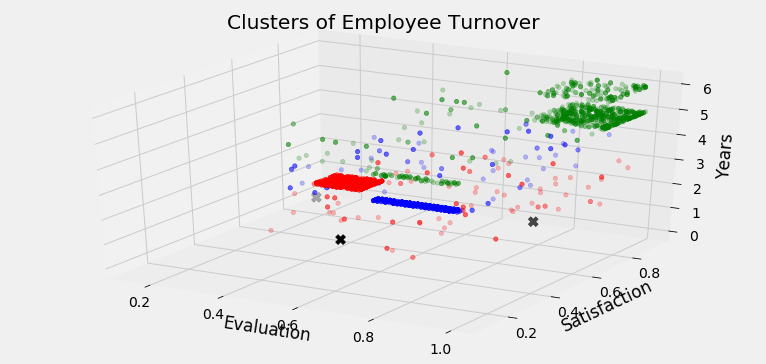

In [383]:
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(hr_data[hr_data.left==1][["satisfaction_level","last_evaluation","time_spend_company"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals=hr_data[hr_data.left==1]["last_evaluation"]
y_vals=hr_data[hr_data.left==1]["satisfaction_level"]
z_vals=hr_data[hr_data.left==1]["time_spend_company"]

ax.scatter(x_vals,y_vals,z_vals,alpha=0.25,color = kmeans_colors)

ax.set_xlabel("Evaluation")
ax.set_ylabel("Satisfaction")
ax.set_zlabel("Years")

x=kmeans.cluster_centers_[:,0]
y=kmeans.cluster_centers_[:,1]
ax.scatter(x,y,color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

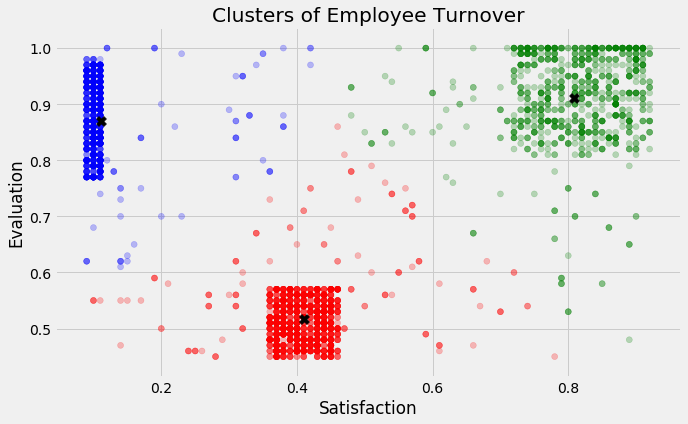

In [382]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(hr_data[hr_data.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=hr_data[hr_data.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

Cluster 1 (Blue): Hard-working and Sad Employees

Cluster 2 (Red): Bad and Sad Employee

Cluster 3 (Green): Hard-working and Happy Employee